--------------------------------------------------
Confidence level: 68%
errordef (Δχ² for 68% CL): 2.2789
a = 2.6139 ± 0.4013
b = -0.5792 ± 0.6008
χ²/ndof = 0.8676789587852508


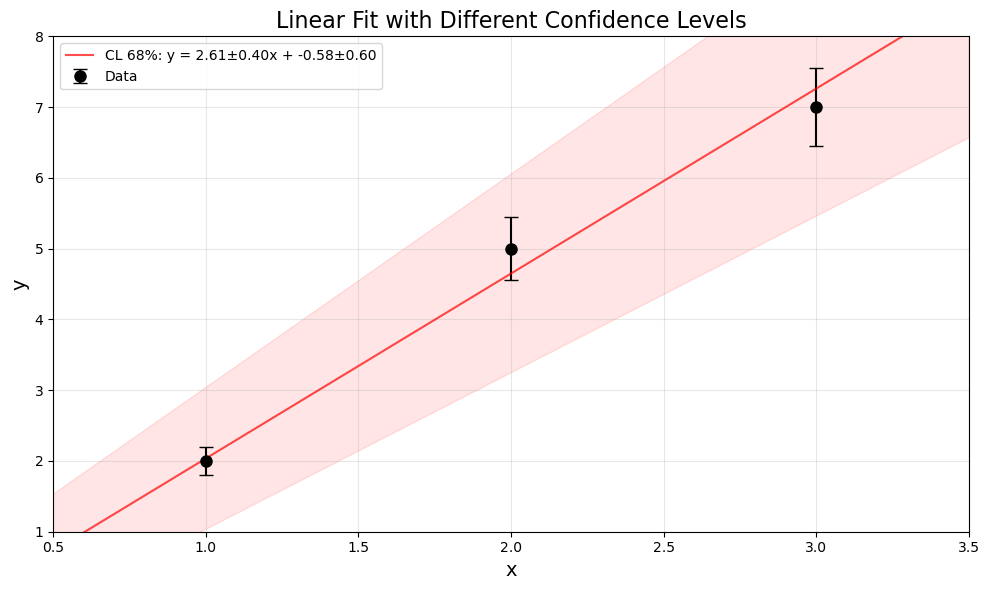

--------------------------------------------------
Confidence level: 90%
errordef (Δχ² for 90% CL): 4.6052
a = 2.6139 ± 0.5705
b = -0.5792 ± 0.8541
χ²/ndof = 0.86767895878525


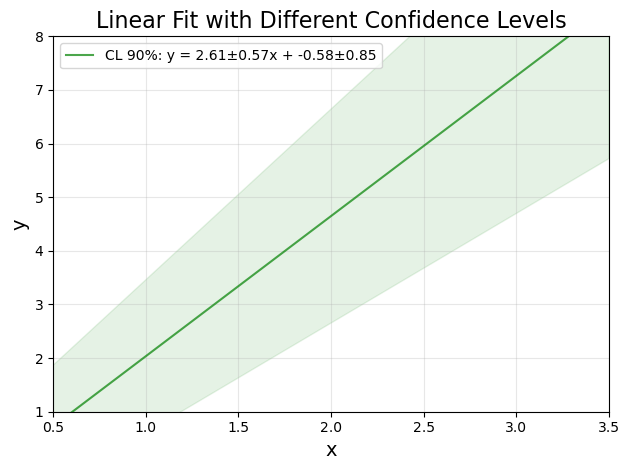

--------------------------------------------------
Confidence level: 99%
errordef (Δχ² for 99% CL): 9.2103
a = 2.6139 ± 0.8068
b = -0.5792 ± 1.2079
χ²/ndof = 0.8676789587852494


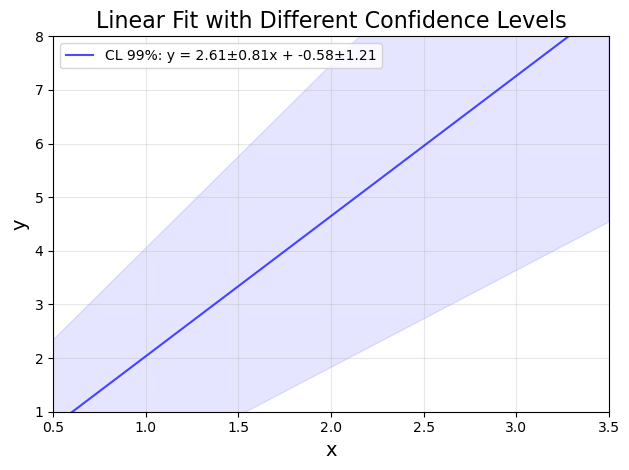

In [ ]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

def model(x, a, b):
    return a * x + b

# Data
x = np.array([1, 2, 3])
y = np.array([2, 5, 7])
yerr = np.array([0.2, 0.45, 0.55])

# Fit setup
cost = LeastSquares(x, y, yerr, model)
m = Minuit(cost, a=1, b=0)

# Confidence levels to analyze
confidence_levels = [0.68, 0.90, 0.99]

# Prepare plot
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, fmt='o', color='black', 
             label='Data', markersize=8, capsize=5)

# Colors for different confidence levels
colors = ['red', 'green', 'blue']

# Loop through confidence levels
for cl, color in zip(confidence_levels, colors):
    # Calculate errordef for this confidence level
    errordef = scipy.stats.chi2.ppf(cl, 2)  # 2 parameters (a, b)

    # Reset and perform fit with this errordef
    m.reset()
    m.errordef = errordef
    m.migrad()
    
    # Get fitted parameters
    a_fit = m.values['a']
    b_fit = m.values['b']
    a_err = m.errors['a']
    b_err = m.errors['b']
    
    # Plot fitted line
    x_fit = np.linspace(0.5, 3.5, 100)
    y_fit = model(x_fit, a_fit, b_fit)
    plt.plot(x_fit, y_fit, '-', color=color, alpha=0.7,
             label=f'CL {cl*100:.0f}%: y = {a_fit:.2f}±{a_err:.2f}x + {b_fit:.2f}±{b_err:.2f}')
    
    # Plot uncertainty band
    y_upper = model(x_fit, a_fit + a_err, b_fit + b_err)
    y_lower = model(x_fit, a_fit - a_err, b_fit - b_err)
    plt.fill_between(x_fit, y_lower, y_upper, color=color, alpha=0.1)
    
    # Print results
    print(50*"-")
    print(f"Confidence level: {cl*100:.0f}%")
    print(f"errordef (Δχ² for {cl*100:.0f}% CL): {errordef:.4f}")
    print(f"a = {a_fit:.4f} ± {a_err:.4f}")
    print(f"b = {b_fit:.4f} ± {b_err:.4f}")
    print(f"χ²/ndof = {m.fval/m.ndof}")

    # Finalize plot
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title('Linear Fit with Different Confidence Levels', fontsize=16)
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xlim(0.5, 3.5)
    plt.ylim(1, 8)
    plt.tight_layout()
    plt.show()